In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.sankey as m_sankey

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

import re
from pathlib import Path
import docx2txt
from collections import Counter
import os
from math import ceil
import plotly.graph_objects as go

#nltk.download('punkt')  # Tokenizer
#nltk.download('stopwords')  # Stopwords list
#nltk.download('averaged_perceptron_tagger')  # Part-of-Speech Tagger
#nltk.download('wordnet')  # Lemmatizer
#nltk.download('maxent_ne_chunker')  # Named Entity Recognition
#nltk.download('words')  # Named Entity Recognition


In [2]:
# List of industries
docx_files = [
    'Advertising_Marketing.docx',
    'Construction_Urban_Planning.docx',
    'Counsulting_Management.docx',
    'Design_Fashion_Technology.docx',
    'Entertainment_game_development.docx',
    'Finance_Banking.docx',
    'Healthcare_Counseling.docx',
    'Information_Technology.docx',
    'Journalism_News_Media.docx',
    'Language_Translation.docx',
    'Legal_Tech_Legal_Service.docx',
    'Pharmaceutical_Research_Development.docx',
    'Publication.docx',
    'Social_Media_Telecommunication.docx'
]

# Function to process each DOCX file
def process_docx(doc_path):
    # Convert docx to plain text
    text = docx2txt.process(doc_path)
    
    # Create the corresponding TXT file path
    txt_path = doc_path.replace('.docx', '.txt')
    
    # Save the text to a .txt file with encoding 'utf-8'
    Path(txt_path).write_text(text, encoding='utf-8')
    
    # Output the path of the saved .txt file
    print({txt_path})

# Process each DOCX file
for docx_file in docx_files:
    process_docx(docx_file)

{'Advertising_Marketing.txt'}
{'Construction_Urban_Planning.txt'}
{'Counsulting_Management.txt'}
{'Design_Fashion_Technology.txt'}
{'Entertainment_game_development.txt'}
{'Finance_Banking.txt'}
{'Healthcare_Counseling.txt'}
{'Information_Technology.txt'}
{'Journalism_News_Media.txt'}
{'Language_Translation.txt'}
{'Legal_Tech_Legal_Service.txt'}
{'Pharmaceutical_Research_Development.txt'}
{'Publication.txt'}
{'Social_Media_Telecommunication.txt'}


In [3]:
# List of text files to process
txt_files = [
    'Advertising_Marketing.txt',
    'Construction_Urban_Planning.txt',
    'Counsulting_Management.txt',
    'Design_Fashion_Technology.txt',
    'Entertainment_game_development.txt',
    'Finance_Banking.txt',
    'Healthcare_Counseling.txt',
    'Information_Technology.txt',
    'Journalism_News_Media.txt',
    'Language_Translation.txt',
    'Legal_Tech_Legal_Service.txt',
    'Pharmaceutical_Research_Development.txt',
    'Publication.txt',
    'Social_Media_Telecommunication.txt'
]

In [4]:
# Function to process each text file
def process_txt(txt_path):
    # Read the content from the saved txt file
    with open(txt_path, 'r', encoding='utf-8') as file:
        text_content = file.read().lower()  # Convert text to lowercase immediately after reading   
    
    # Remove symbols, newline characters, and numbers
    text_content = re.sub(r'[^\w\s]', '', text_content)  # Removes symbols
    text_content = re.sub(r'[\n\t]', ' ', text_content)  # Replaces newline and tab characters with spaces
    text_content = re.sub(r'\d+', '', text_content)  # Removes numbers
    
    # Tokenization into words
    words = word_tokenize(text_content)

    # Removing stopwords, filtering out common words that do not contribute much meaning to the sentences.
    default_stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in default_stop_words]

    # Lemmatization, ensures the root word (lemma) is a valid word
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return lemmatized_words

# List of text files to process
txt_files = [file.replace('.docx', '.txt') for file in docx_files]

# Process each text file to get the lemmatized words for analysis
lemmatized_words = []
for txt_file in txt_files:
    lemmatized_words.extend(process_txt(txt_file))

In [5]:
# Define additional stopwords, CAN BE MODIFIED TO EXCLUDE ADDITONAL WORDS
added_stopwords = {'use', 'used', 'using', 'may', 'work', 'also', 'text', 'ways',
                   'uio', "tool", "university", "provide", "relevant","different",
                   "genai","school","allowed", "p"}

# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english')).union(added_stopwords) 

#### 1.1 Frequency Analysis 

C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\3519935975.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, ha='right', rotation_mode='anchor')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\3519935975.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, ha='right', rotation_mode='anchor')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\3519935975.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(words, ha='right', rotation_mode='anchor')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\3519935975.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wor

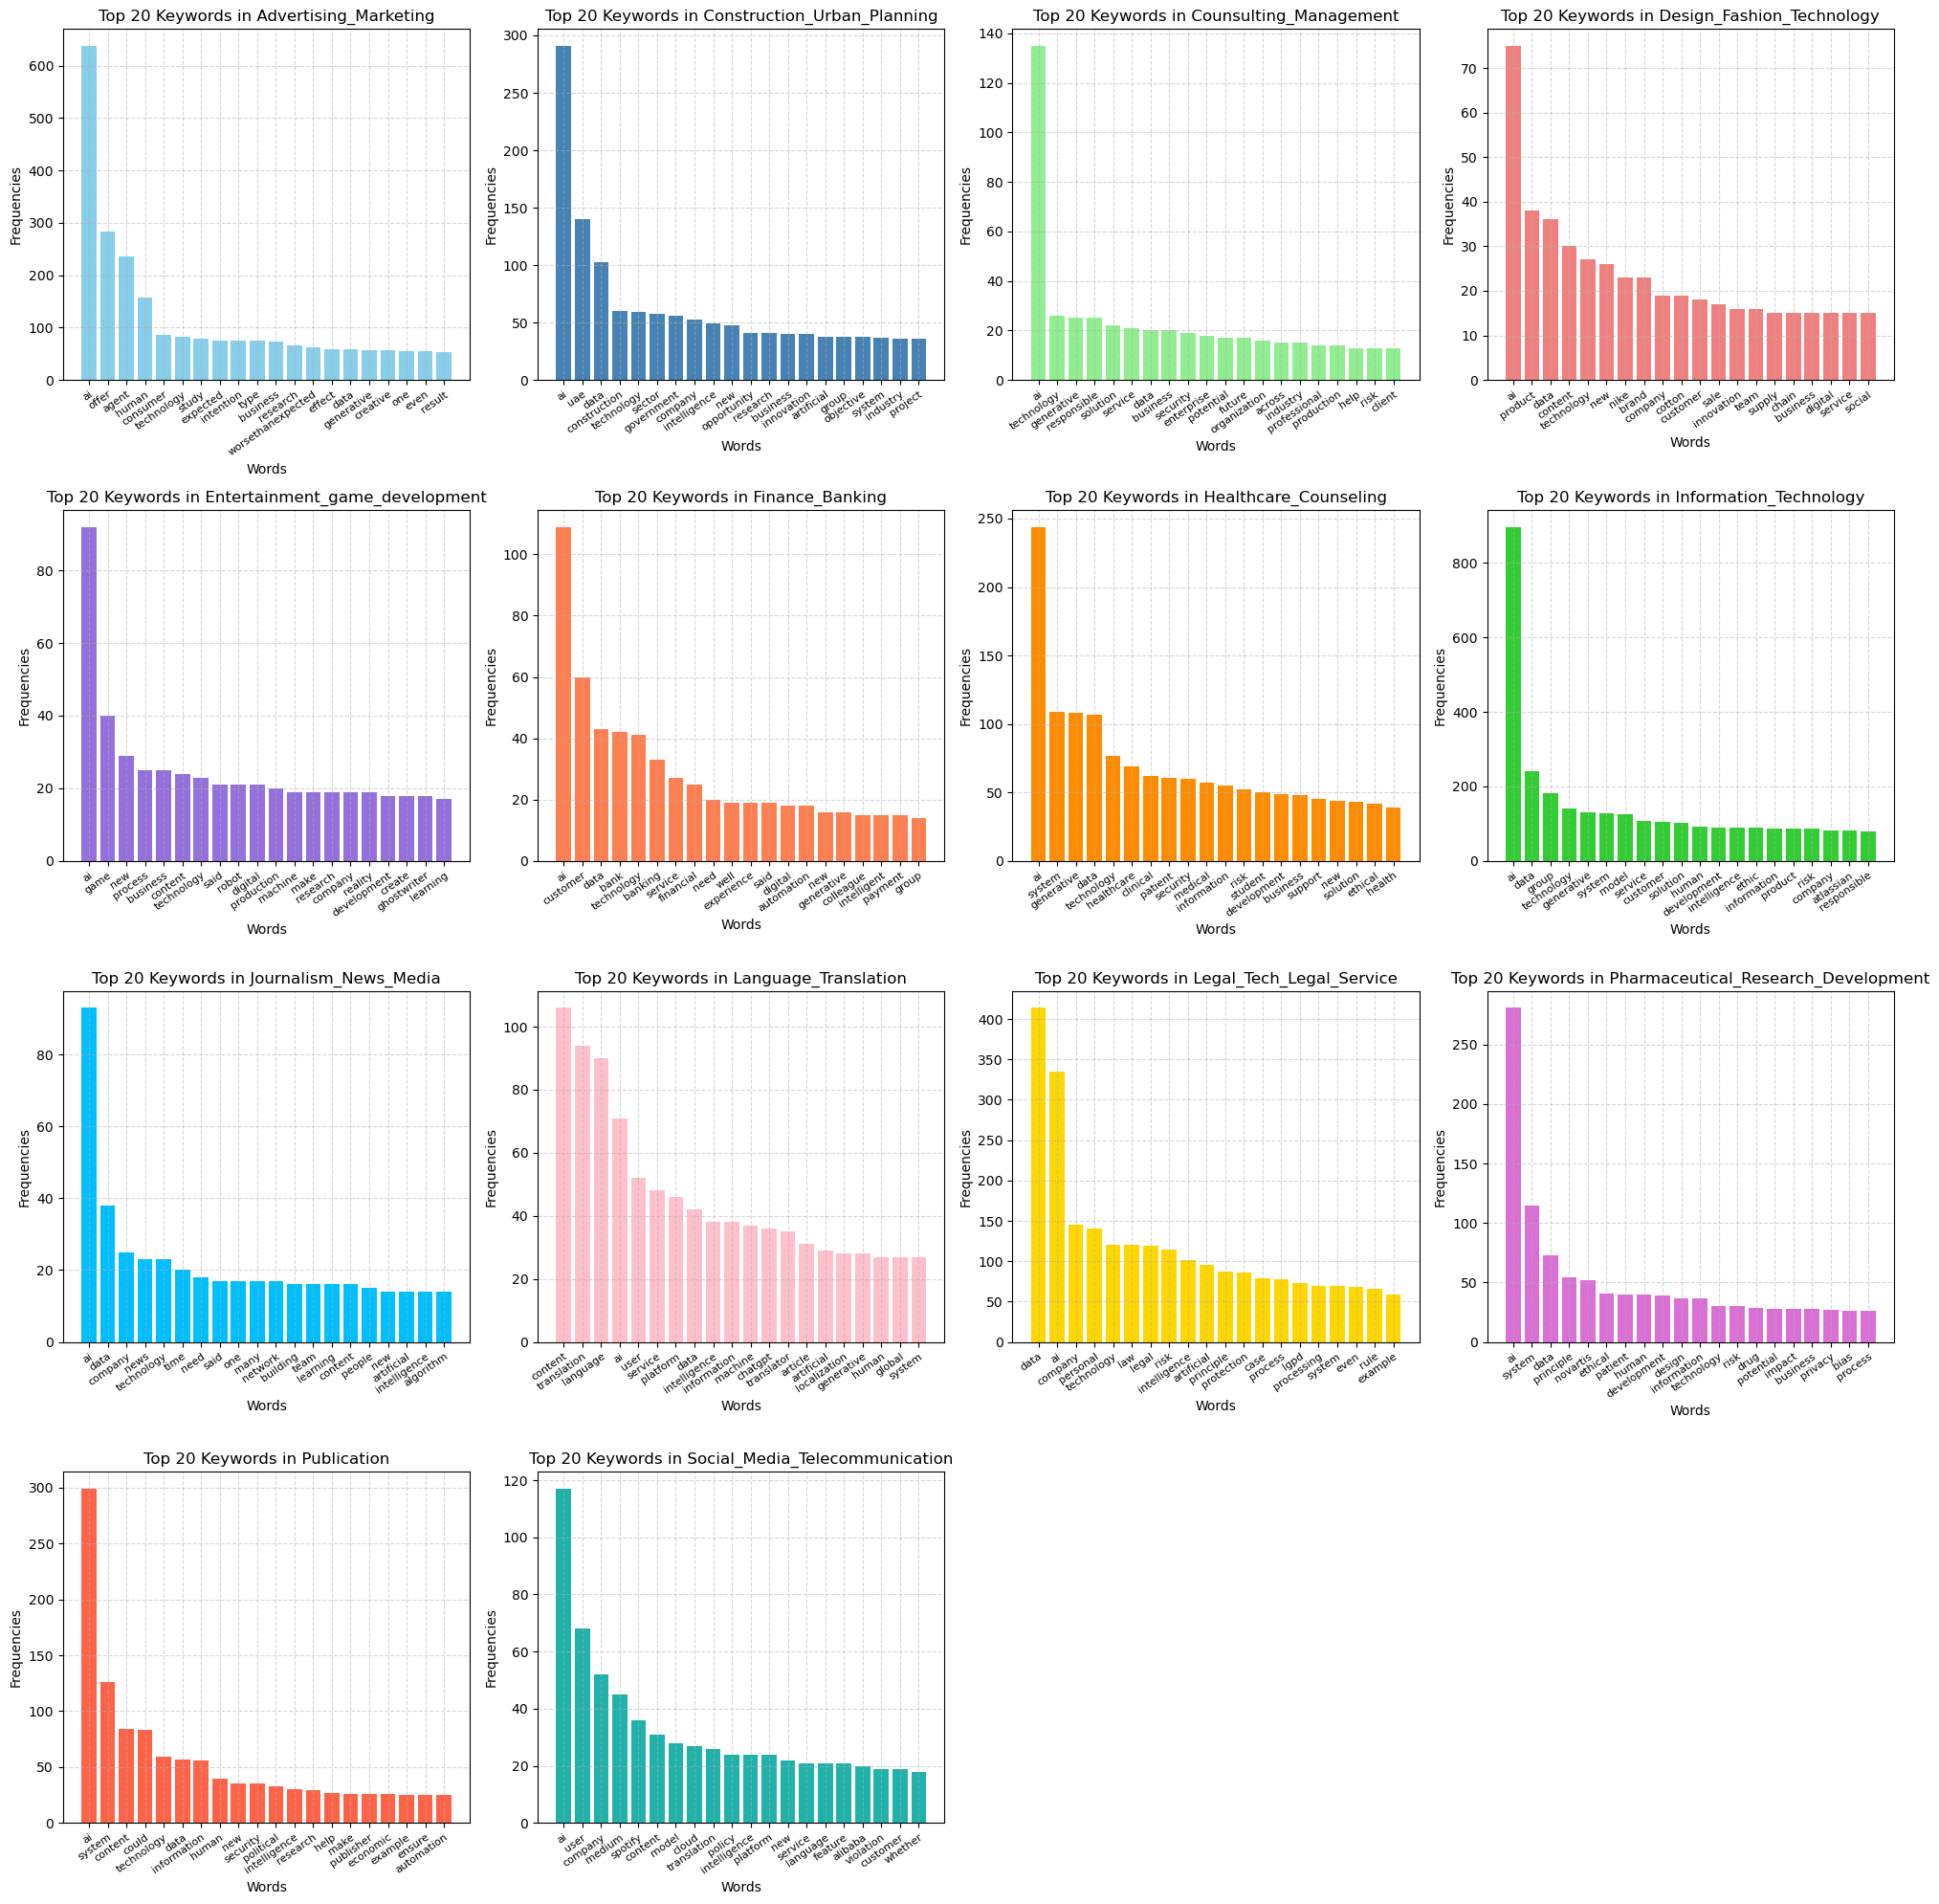

'combined_frequency_charts.png'

In [7]:
# Generate a list of chart colors
chart_colors = [
    'skyblue', 'steelblue', 'lightgreen', 'lightcoral', 'mediumpurple', 
    'coral', 'darkorange', 'limegreen', 'deepskyblue', 'pink', 'gold', 
    'orchid', 'tomato', 'lightseagreen', 'slateblue', 'firebrick'
]

def plot_frequency_chart(ax, words, title, color):
    # Filter out the stopwords
    filtered_words = [word for word in words if word not in all_stopwords]
    
    counter = Counter(filtered_words)
    most_common = counter.most_common(20)
    
    if most_common:
        words, frequencies = zip(*most_common)
        colors = chart_colors[:len(words)]
        ax.bar(words, frequencies, color=color)
        ax.set_xlabel('Words')
        ax.set_ylabel('Frequencies')
        ax.set_title(f'Top 20 Keywords in {title}')
        
        # Adjust rotation and font size to handle overlap
        ax.tick_params(axis='x', rotation=35, labelsize=8)
        ax.set_xticklabels(words, ha='right', rotation_mode='anchor')
        ax.grid(True, linestyle='--', alpha=0.5)
    else:
        ax.text(0.5, 0.5, 'No Data Available', ha='center', va='center', fontsize=12)
        ax.axis('off')
        
# Process each text file and create frequency charts
all_filtered_words = {}
n_files = len(txt_files)
rows = 4
cols = 4

# Create subplots for each category in a 4x4 grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()  # Flatten to a 1D array for easy indexing

for i, txt_file in enumerate(txt_files):
    filtered_words = process_txt(txt_file)
    
    # Extract the file name without the extension to use as the category name
    category_name = os.path.splitext(os.path.basename(txt_file))[0]
    
    all_filtered_words[category_name] = filtered_words
    
    # Plot the frequency chart in the respective subplot
    plot_frequency_chart(axes[i], filtered_words, category_name, chart_colors[i % len(chart_colors)])

# Turn off any unused subplots
for j in range(len(txt_files), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
output_path = 'combined_frequency_charts.png'
plt.savefig(output_path, dpi=300)
plt.show()

# Provide the file path for download
output_path

#### 1.2 Sectors Word matching

In [9]:
implementation_keywords = {
    "Advertising & Marketing": [
        "branding", "campaign", "SEO", "consumer", "engagement", "analytics", "creative", "strategy", 
        "audience", "conversion", "content", "advertisement", "awareness", "targeting", "budget", 
        "performance", "lead", "influencer", "digital", "promotion"
    ],
    
    "Construction & Urban Planning": [
        "infrastructure", "development", "zoning", "architecture", "sustainability", "permit", "urbanization", 
        "design", "building", "project", "planning", "landscape", "site", "construction", "structure", 
        "materials", "blueprint", "engineer", "regulation", "safety"
    ],

    "Counsulting & Management": [
        "operation", "manage", "assessment", "administration", "flexibile", "guidance", "coaching", 
        "strategy", "intervention", "conflict", "mediation", "supervision", "leadership", "communication", 
        "problem-solving", "consulting", "stress", "motivation", "feedback", "workplace"
    ],

    "Design, Fashion & Technology": [
        "creativity", "design", "fashion", "technology", "sustainability", "innovation", "textile", 
        "styling", "trends", "aesthetics", "digital", "wearable", "prototyping", "craftsmanship", 
        "product", "merchandising", "luxury", "brand", "tailoring", "materials"
    ],

    "Entertainment & Game Development": [
        "storytelling", "gameplay", "interactive", "design", "development", "narrative", "graphics", 
        "audio", "player", "mechanics", "level", "platform", "multiplayer", "AI", "engagement", 
        "characters", "experience", "virtual", "simulation", "console"
    ],

    "Finance & Banking": [
        "investment", "capital", "banking", "risk", "credit", "economy", "market", "fund", 
        "assets", "equity", "interest", "stocks", "portfolio", "liquidity", "compliance", 
        "diversification", "returns", "transaction", "lending", "financial planning"
    ],

    "Healthcare & Counseling": [
        "diagnosis", "treatment", "patient", "therapy", "prevention", "wellness", "clinical", 
        "healthcare", "mental health", "counseling", "intervention", "care", "recovery", 
        "rehabilitation", "medicine", "support", "consultation", "assessment", "nursing", "therapy"
    ],

    "Information Technology": [
        "networking", "software", "programming", "database", "cloud", "cybersecurity", "development", 
        "data", "analysis", "infrastructure", "AI", "machine learning", "automation", "hardware", 
        "systems", "architecture", "API", "blockchain", "IoT", "virtualization"
    ],

    "Journalism, News & Media": [
        "reporting", "journalism", "editorial", "storytelling", "press", "media", "communication", 
        "freedom", "ethics", "broadcast", "digital", "investigation", "narrative", "fact-checking", 
        "newsroom", "publishing", "distribution", "journalist", "content", "social media"
    ],

    "Language Translation": [
        "translation", "localization", "interpretation", "linguistics", "culture", "bilingual", 
        "terminology", "fluency", "document", "content", "machine translation", "multilingual", 
        "transcription", "accuracy", "context", "language", "expression", "semantics", "syntax", "communication"
    ],

    "Legal Tech & Legal Services": [
        "compliance", "contract", "litigation", "regulation", "advisory", "consultation", "ethics", 
        "legal", "jurisdiction", "case", "AI", "discovery", "court", "justice", "negotiation", 
        "intellectual property", "legal tech", "research", "privacy", "rights"
    ],

    "Pharmaceutical Research & Development": [
        "clinical trial", "drug", "innovation", "treatment", "regulation", "development", "approval", 
        "research", "pharmaceutical", "vaccine", "medicine", "data", "biotech", "safety", "patent", 
        "genomics", "molecule", "efficacy", "therapeutics", "manufacturing"
    ],

    "Publication": [
        "publishing", "editorial", "content", "author", "review", "manuscript", "journal", 
        "media", "distribution", "publication", "copyright", "licensing", "article", 
        "book", "e-book", "print", "marketing", "digital", "promotion", "platform"
    ],

    "Social Media & Telecommunication": [
        "connectivity", "platform", "content", "broadcast", "digital", "network", "engagement", 
        "media", "communication", "telecom", "service", "streaming", "community", "branding", 
        "technology", "marketing", "advertising", "reach", "interaction", "messaging"
    ]
}

C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, rotation=45, ha='right')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, rotation=45, ha='right')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, rotation=45, ha='right')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, r

 
Frequency of top 10 words for Advertising & Marketing:
content: 381
digital: 222
consumer: 156
strategy: 134
lead: 96
performance: 89
creative: 88
audience: 46
engagement: 45
analytics: 41
 
Frequency of top 10 words for Construction & Urban Planning:
development: 323
design: 187
regulation: 165
project: 144
safety: 111
building: 103
construction: 89
infrastructure: 85
planning: 54
site: 42
 
Frequency of top 10 words for Counsulting & Management:
operation: 134
strategy: 134
assessment: 67
communication: 48
workplace: 48
guidance: 45
manage: 31
feedback: 26
administration: 22
consulting: 18
 
Frequency of top 10 words for Design, Fashion & Technology:
technology: 747
product: 314
digital: 222
design: 187
innovation: 187
brand: 74
creativity: 38
sustainability: 28
fashion: 10
tailoring: 8
 
Frequency of top 10 words for Entertainment & Game Development:
development: 323
platform: 213
design: 187
experience: 170
level: 110
engagement: 45
virtual: 42
audio: 30
player: 29
narrative: 14


C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, rotation=45, ha='right')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, rotation=45, ha='right')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, rotation=45, ha='right')
C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, r

 
Frequency of top 10 words for Finance & Banking:
risk: 398
market: 133
investment: 120
compliance: 99
interest: 71
transaction: 49
economy: 43
banking: 37
capital: 33
fund: 30
 
Frequency of top 10 words for Healthcare & Counseling:
support: 183
patient: 109
healthcare: 109
clinical: 70
assessment: 67
medicine: 38
care: 37
diagnosis: 33
treatment: 30
prevention: 17
 
Frequency of top 10 words for Information Technology:
data: 1263
development: 323
analysis: 127
automation: 112
cloud: 108
software: 92
infrastructure: 85
cybersecurity: 56
database: 32
programming: 21
 
Frequency of top 10 words for Journalism, News & Media:
content: 381
digital: 222
communication: 48
reporting: 23
investigation: 23
narrative: 14
freedom: 13
publishing: 13
press: 12
distribution: 11
 
Frequency of top 10 words for Language Translation:
content: 381
language: 204
translation: 130
context: 108
document: 92
culture: 59
accuracy: 53
communication: 48
localization: 29
multilingual: 15
 
Frequency of top 10 w

C:\Users\xiaoh\AppData\Local\Temp\ipykernel_35824\1154606006.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_keywords, rotation=45, ha='right')


 
Frequency of top 10 words for Social Media & Telecommunication:
technology: 747
service: 421
content: 381
digital: 222
platform: 213
network: 119
marketing: 81
community: 56
interaction: 52
communication: 48


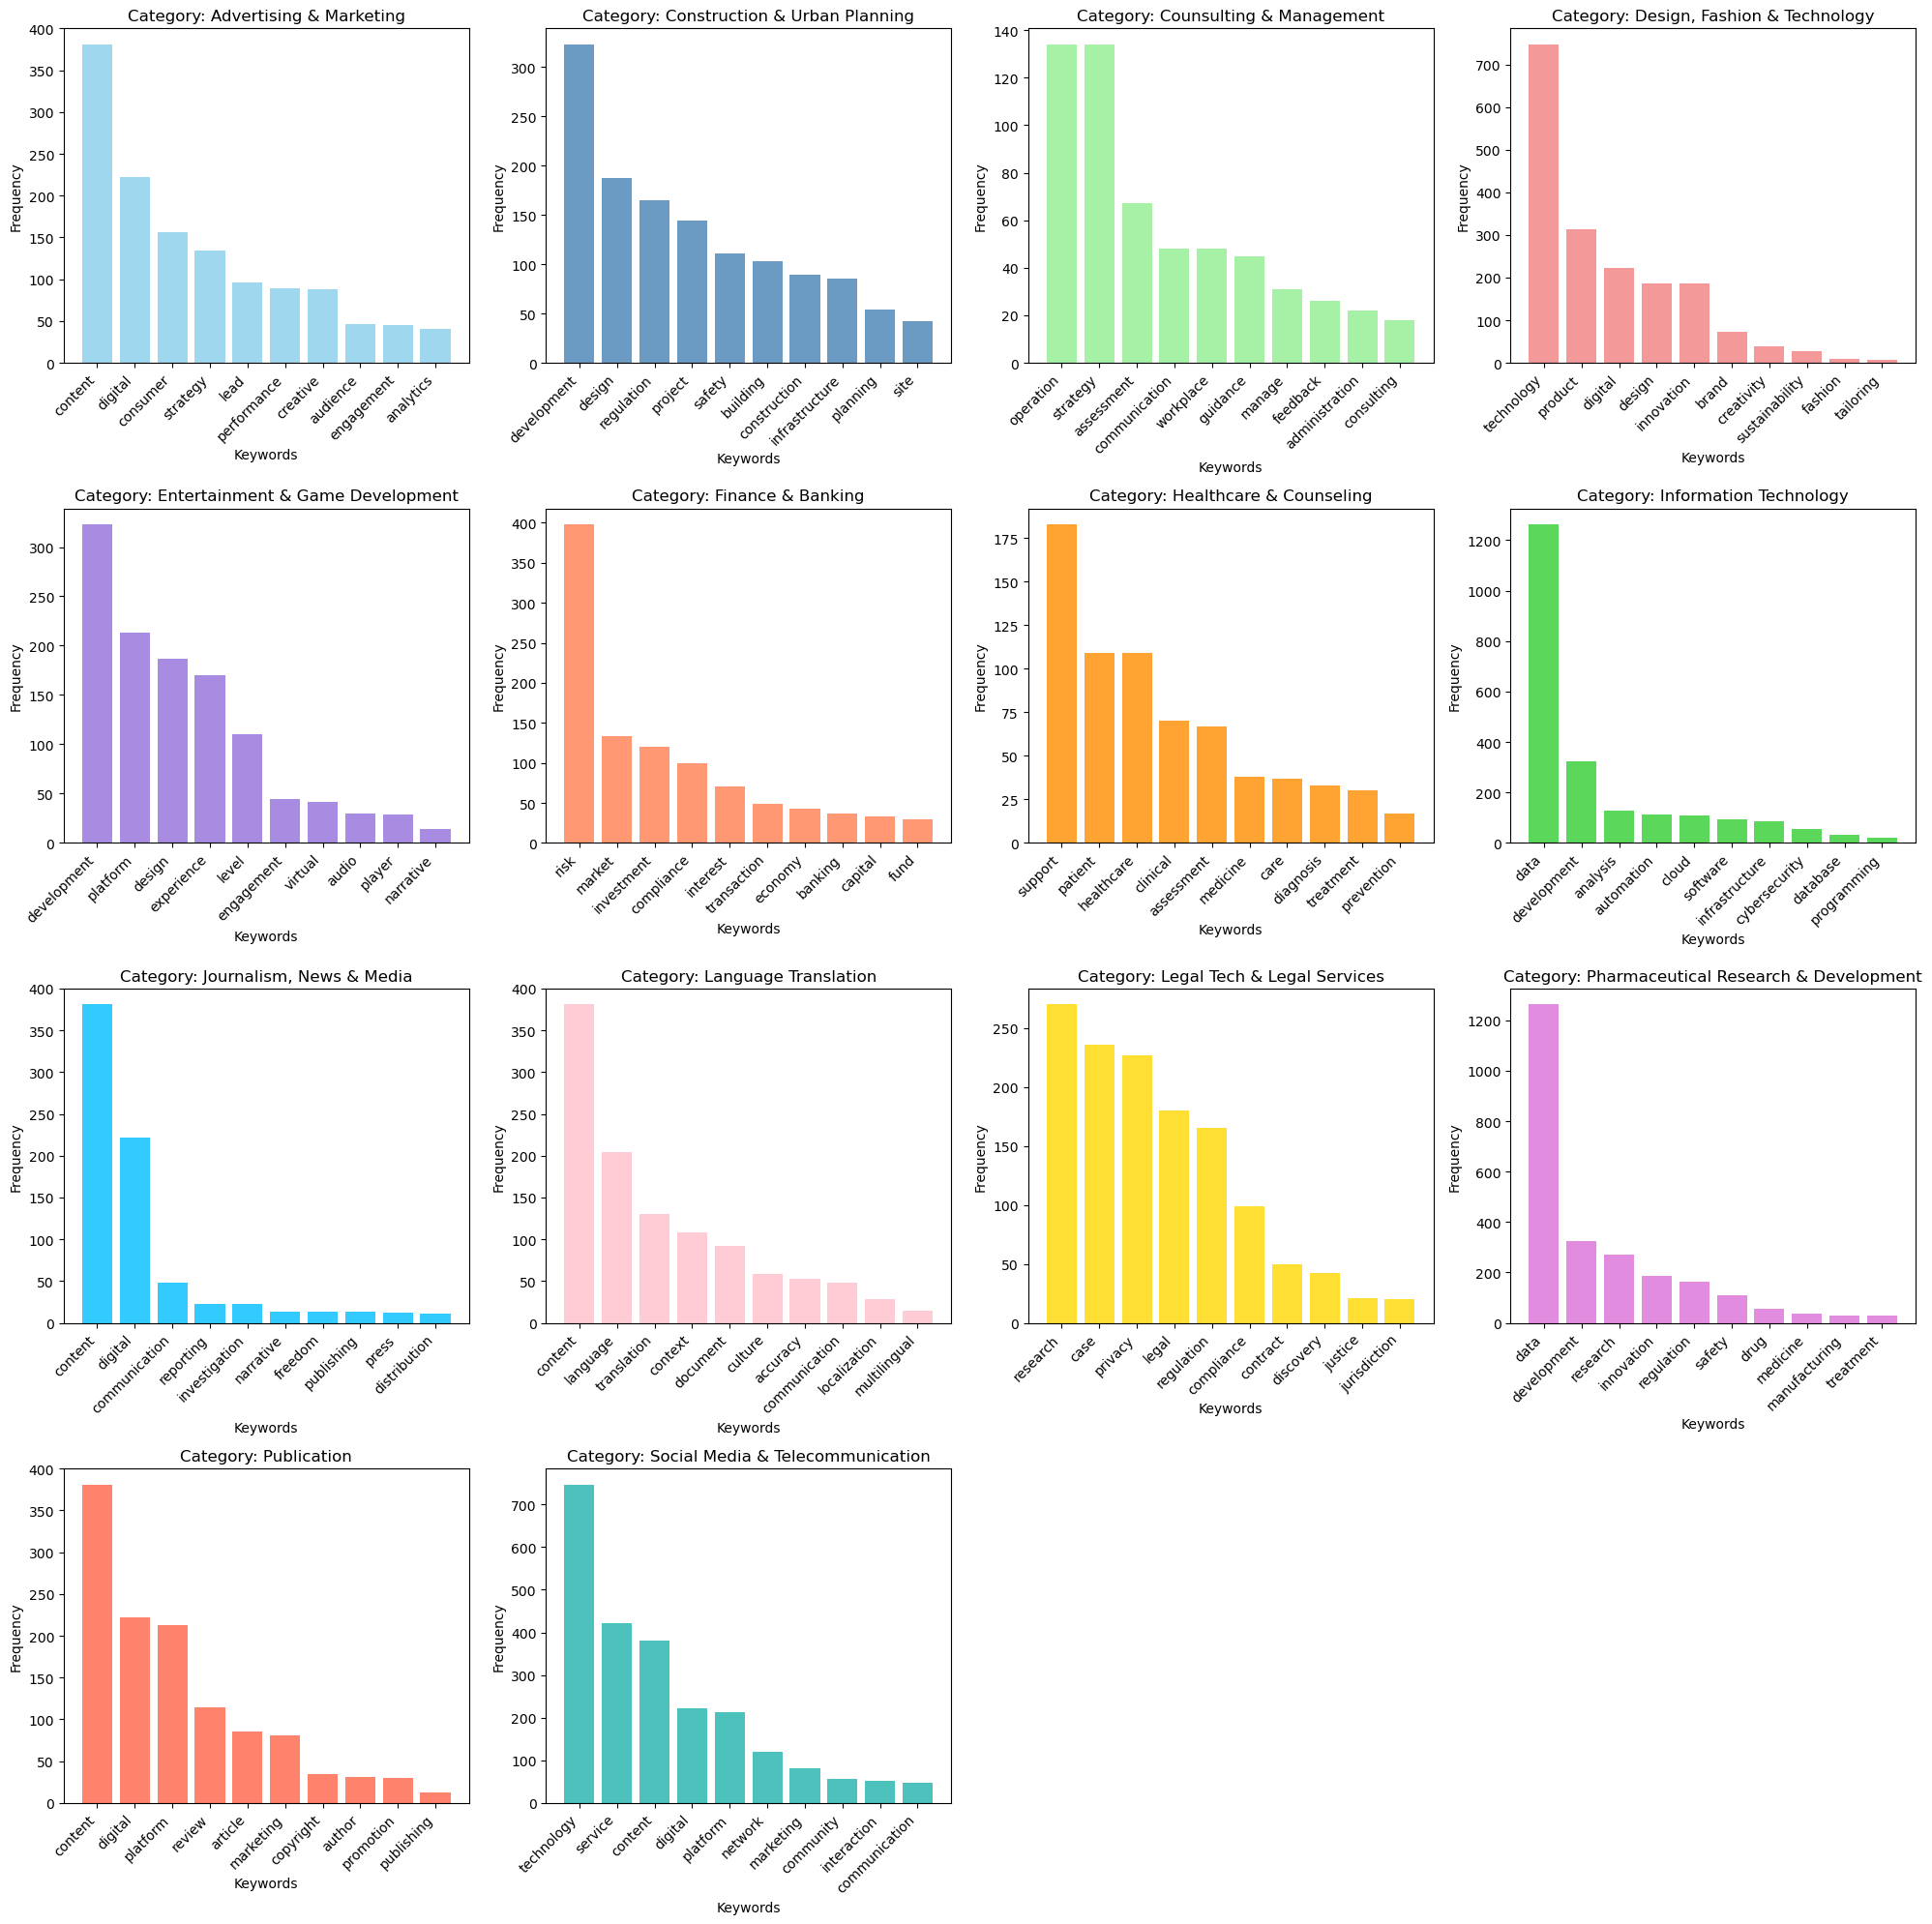

In [10]:
# Count the frequency of each keyword
keyword_frequencies = {category: {keyword: lemmatized_words.count(keyword) for keyword in keywords} 
                       for category, keywords in implementation_keywords.items()}

# Create a figure to hold all subplots (bar charts)
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  # Adjust to 4x4 grid for 14 charts
axes = axes.ravel()  # Flatten the axes array

# Extended color palette for plotting
colors = ['skyblue', 'steelblue', 'lightgreen', 'lightcoral', 'mediumpurple', 
          'coral', 'darkorange', 'limegreen', 'deepskyblue', 'pink', 'gold', 
          'orchid', 'tomato', 'lightseagreen', 'slateblue', 'firebrick']

# Create a bar chart for each category
for ax, (category, keywords), color in zip(axes, implementation_keywords.items(), colors):
    # Calculate frequencies for each keyword
    keyword_freq = {keyword: lemmatized_words.count(keyword) for keyword in keywords}
    
    # Sort the frequencies in descending order and keep the top 10
    sorted_keywords = sorted(keyword_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Unpack the sorted keywords and frequencies
    if sorted_keywords:
        top_keywords, top_frequencies = zip(*sorted_keywords)
    
        # Plot the top 10 keywords by frequency
        ax.bar(top_keywords, top_frequencies, color=color, alpha=0.8)
        ax.set_title(f'Category: {category}')
        ax.set_xlabel('Keywords')
        ax.set_ylabel('Frequency')
        ax.set_xticklabels(top_keywords, rotation=45, ha='right')
    
        # Print out the frequency of words for the current subplot (sorted)
        print(" ")
        print(f"Frequency of top 10 words for {category}:")
        for keyword, frequency in sorted_keywords:
            print(f"{keyword}: {frequency}")
    else:
        ax.set_title(f'Category: {category}')
        ax.set_xlabel('Keywords')
        ax.set_ylabel('Frequency')
        ax.set_xticklabels([])

# If there are any empty subplots (because we only have 14 categories but 16 subplots in 4x4 grid), hide the extra subplots
for j in range(len(implementation_keywords), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig("keyword_frequencies.png", format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#### 1.3 Heatmap Analysis

 TF-IDF (Term Frequency-Inverse Document Frequency) to represent the text from each industry. This method helps by assigning higher importance to words that are frequent in a specific document but rare across the entire dataset, calculate the cosine similarity between these vectors. Cosine similarity measures the angle between two vectors, giving a value between 0 (completely different) and 1 (completely similar)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

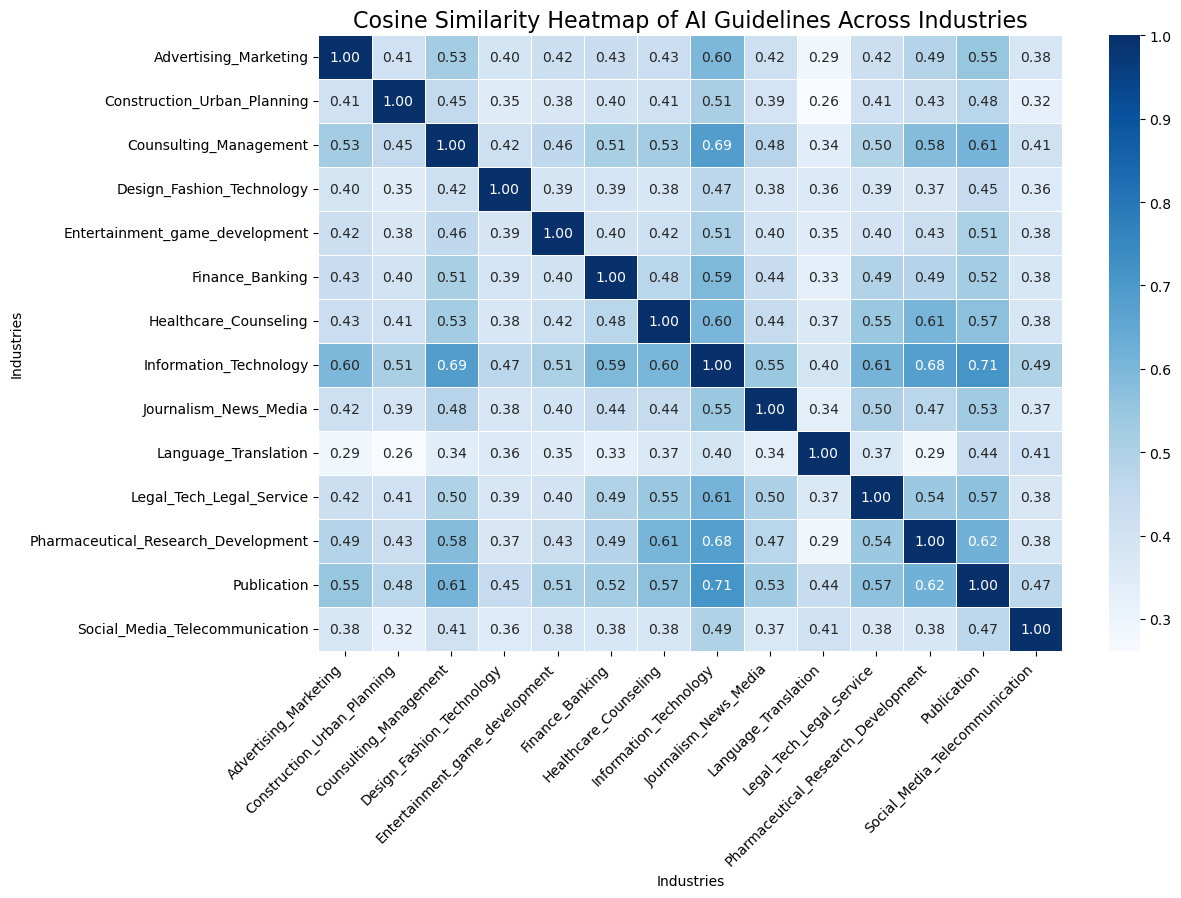

In [14]:
# Function to process all text files and generate TF-IDF vectors
def get_tfidf_matrix(text_files):
    # Read each text file, process the text, and combine into a list of documents
    corpus = [' '.join(process_txt(txt_file)) for txt_file in text_files]
    
    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    
    # Fit and transform the corpus into a TF-IDF matrix
    X = vectorizer.fit_transform(corpus)
    
    return X, vectorizer

# Extract industry names from text file names
industry_names = [os.path.basename(txt_file).replace('.txt', '') for txt_file in txt_files]

# Generate the TF-IDF matrix for the text files
tfidf_matrix, vectorizer = get_tfidf_matrix(txt_files)

# Function to compute cosine similarity and plot a heatmap
def plot_similarity_heatmap(tfidf_matrix, industry_names, filename='similarity_heatmap.png'):
    # Compute cosine similarity between TF-IDF vectors
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    # Create a pandas DataFrame to store the similarity matrix
    similarity_df = pd.DataFrame(similarity_matrix, index=industry_names, columns=industry_names)
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))  # Adjust size for better visualization
    sns.heatmap(similarity_df, cmap='Blues', annot=True, fmt=".2f", linewidths=0.5)
    
    # Customize the heatmap with titles and labels
    plt.title("Cosine Similarity Heatmap of AI Guidelines Across Industries", fontsize=16)
    plt.xlabel("Industries")
    plt.ylabel("Industries")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    
    # Save the figure as an image file
    plt.savefig(filename, format='png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

# Plot the cosine similarity heatmap and save as an image
plot_similarity_heatmap(tfidf_matrix, industry_names, 'similarity_heatmap.png')

#### 1.4 snakey graph

In [16]:
# Implementation keywords dictionary
top_implementation_keywords = {
   "Advertising & Marketing": ["content", "digital", "consumer", "strategy", "lead", "performance", "creative", "audience", "engagement", "analytics"],
    "Construction & Urban Planning": ["development", "design", "regulation", "project", "safety", "building", "construction", "infrastructure", "planning", "site"],
    "Counsulting & Management": ["operation", "strategy", "assessment", "communication", "workplace", "guidance", "manage", "feedback", "administration", "consulting"],
    "Design, Fashion & Technology": ["technology", "product", "digital", "design", "innovation", "brand", "creativity", "sustainability", "fashion", "tailoring"],
    "Entertainment & Game Development": ["development", "platform", "design", "experience", "level", "engagement", "virtual", "audio", "player", "narrative"],
    "Finance & Banking": ["risk", "market", "investment", "compliance", "interest", "transaction", "economy", "banking", "capital", "fund"],
    "Healthcare & Counseling": ["support", "patient", "healthcare", "clinical", "assessment", "medicine", "care", "diagnosis", "treatment", "prevention"],
    "Information Technology": ["data", "development", "analysis", "automation", "cloud", "software", "infrastructure", "cybersecurity", "database", "programming"],
    "Journalism, News & Media": ["content", "digital", "communication", "reporting", "investigation", "narrative", "freedom", "publishing", "press", "distribution"],
    "Language Translation": ["content", "language", "translation", "context", "document", "culture", "accuracy", "communication", "localization", "multilingual"],
    "Legal Tech & Legal Services": ["research", "case", "privacy", "legal", "regulation", "compliance", "contract", "discovery", "justice", "jurisdiction"],
    "Pharmaceutical Research & Development": ["data", "development", "research", "innovation", "regulation", "safety", "drug", "medicine", "manufacturing", "treatment"],
    "Publication": ["content", "digital", "platform", "review", "article", "marketing", "copyright", "author", "promotion", "publishing"],
    "Social Media & Telecommunication": ["technology", "service", "content", "digital", "platform", "network", "marketing", "community", "interaction", "communication"]
}

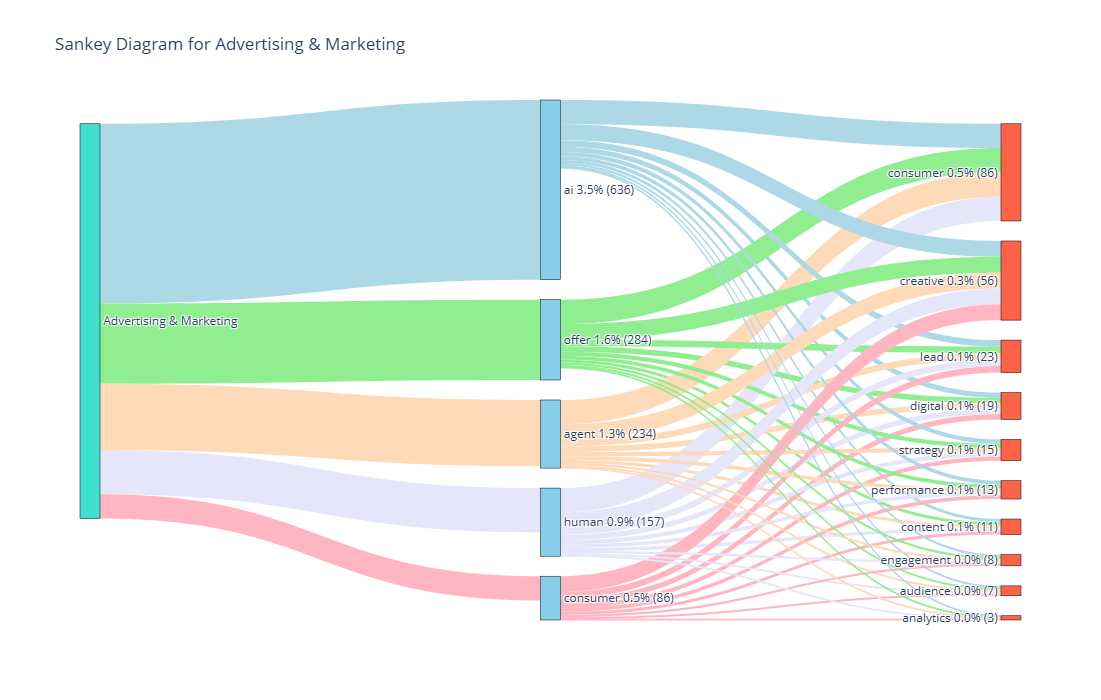

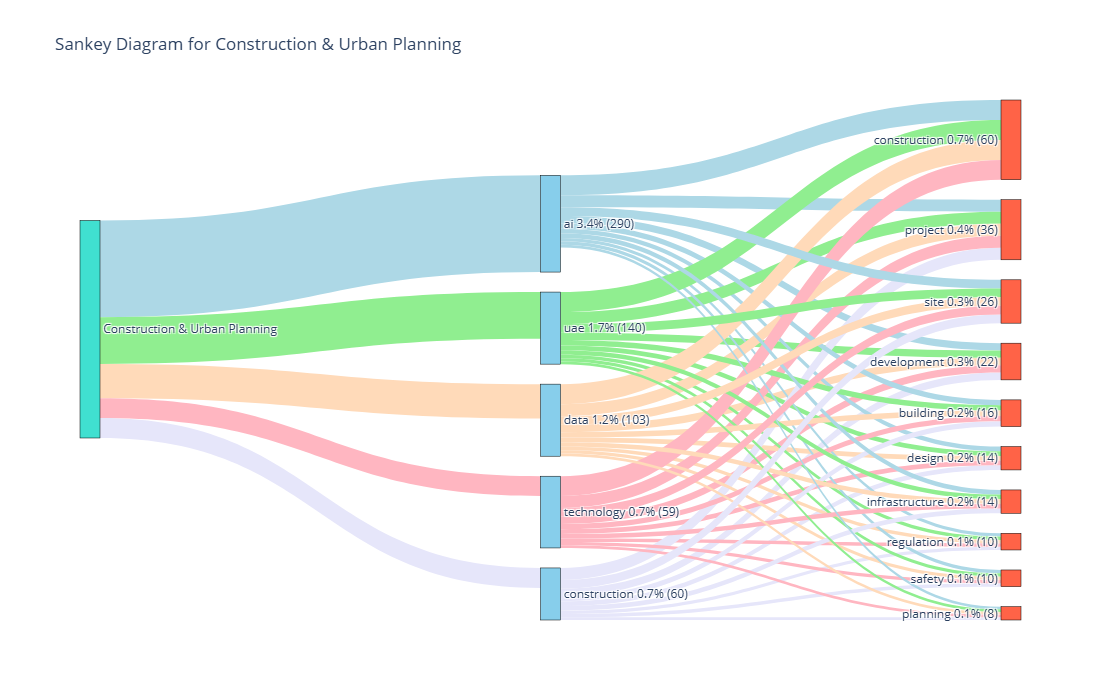

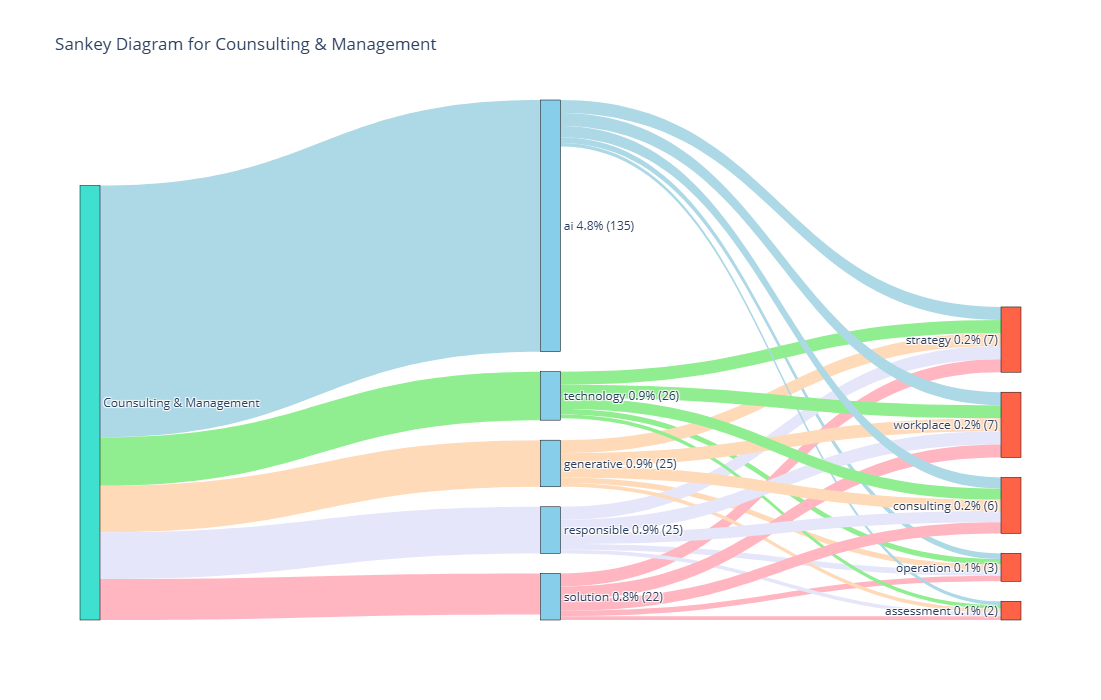

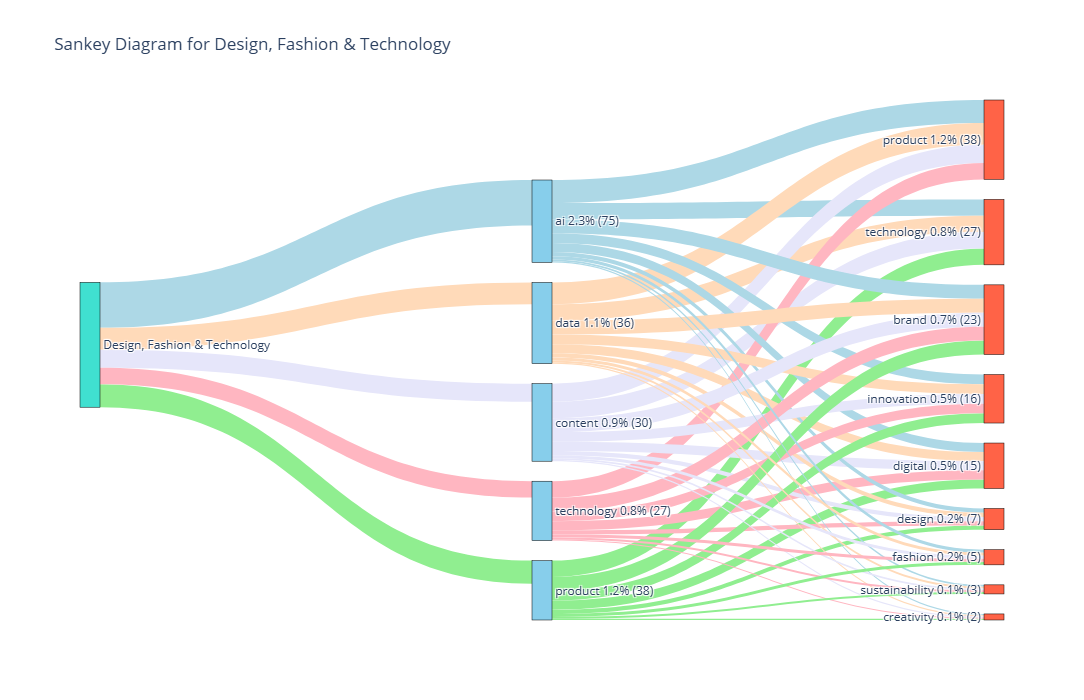

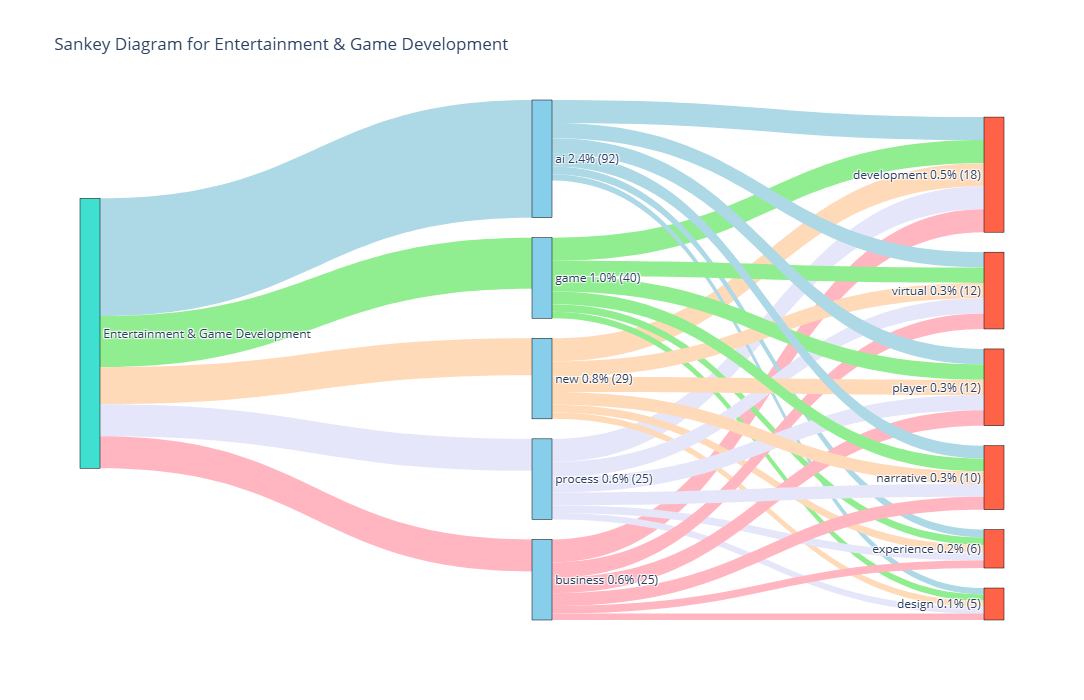

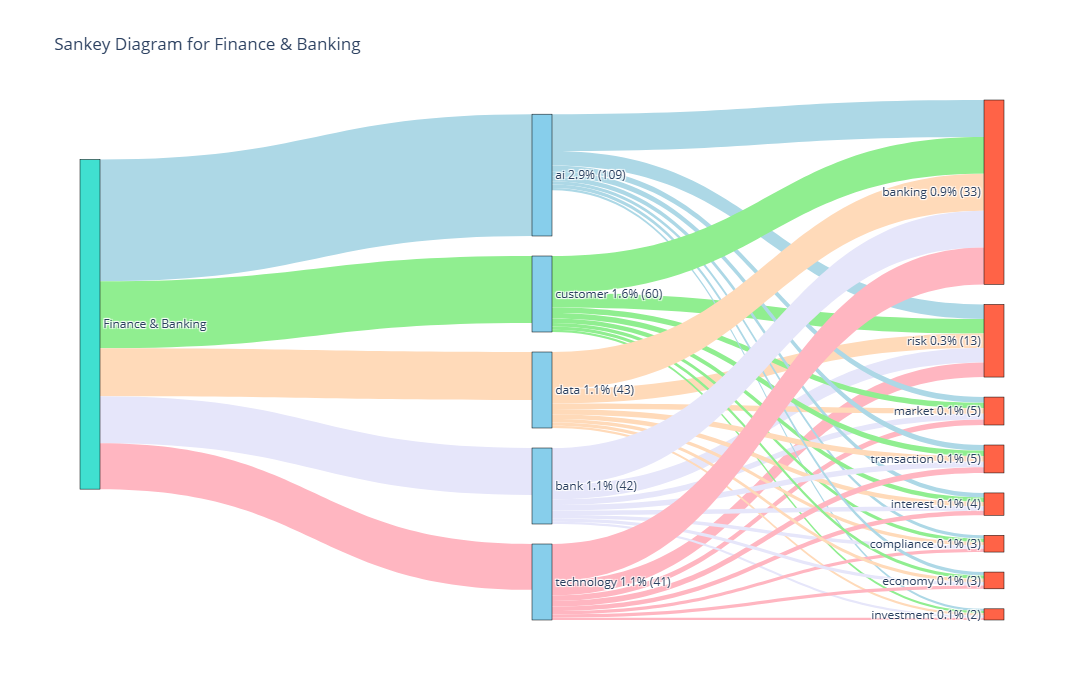

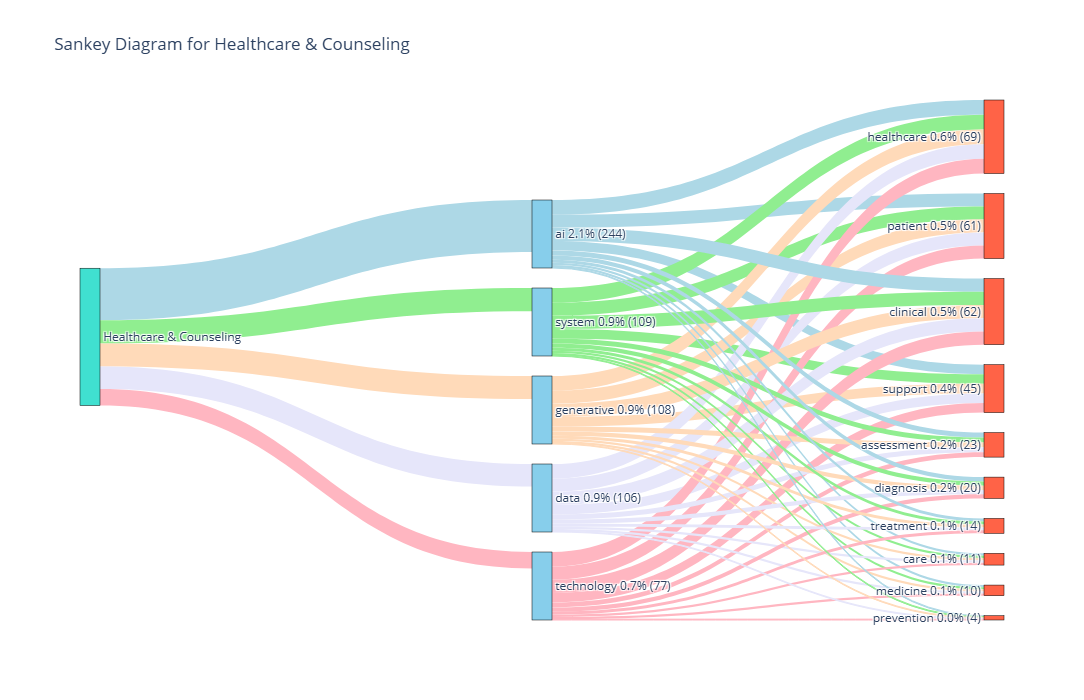

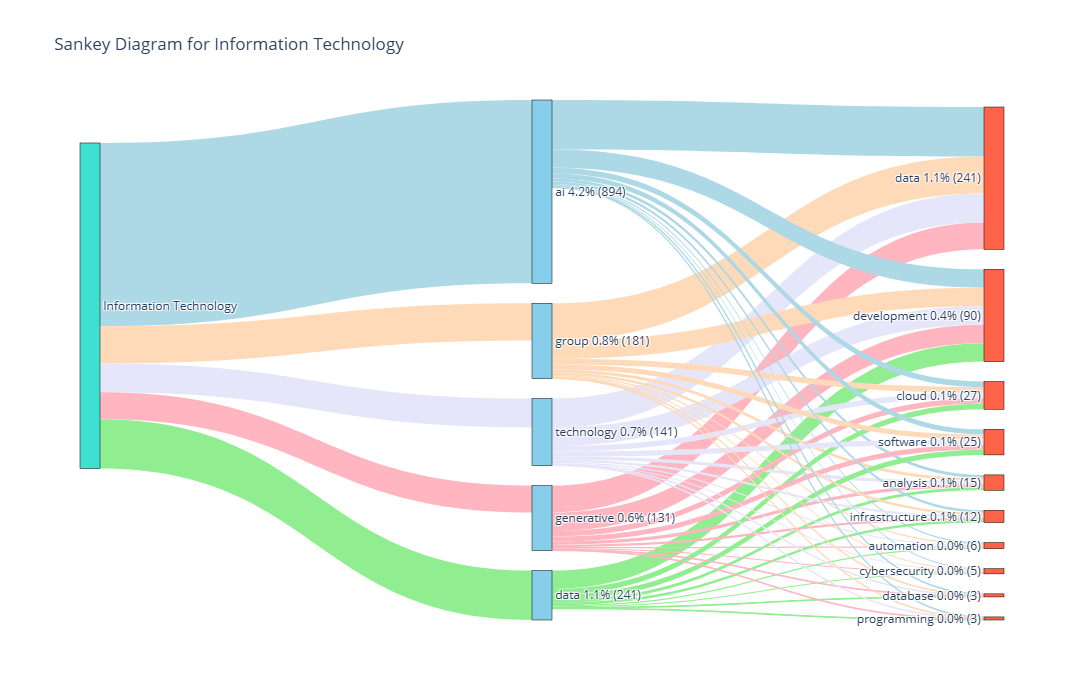

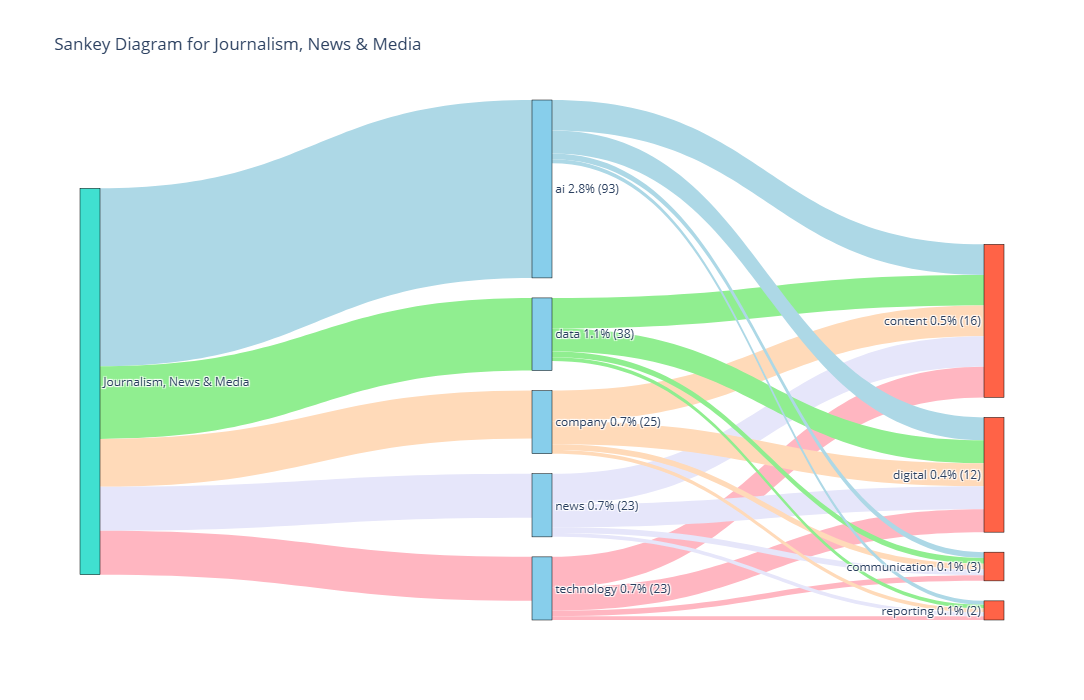

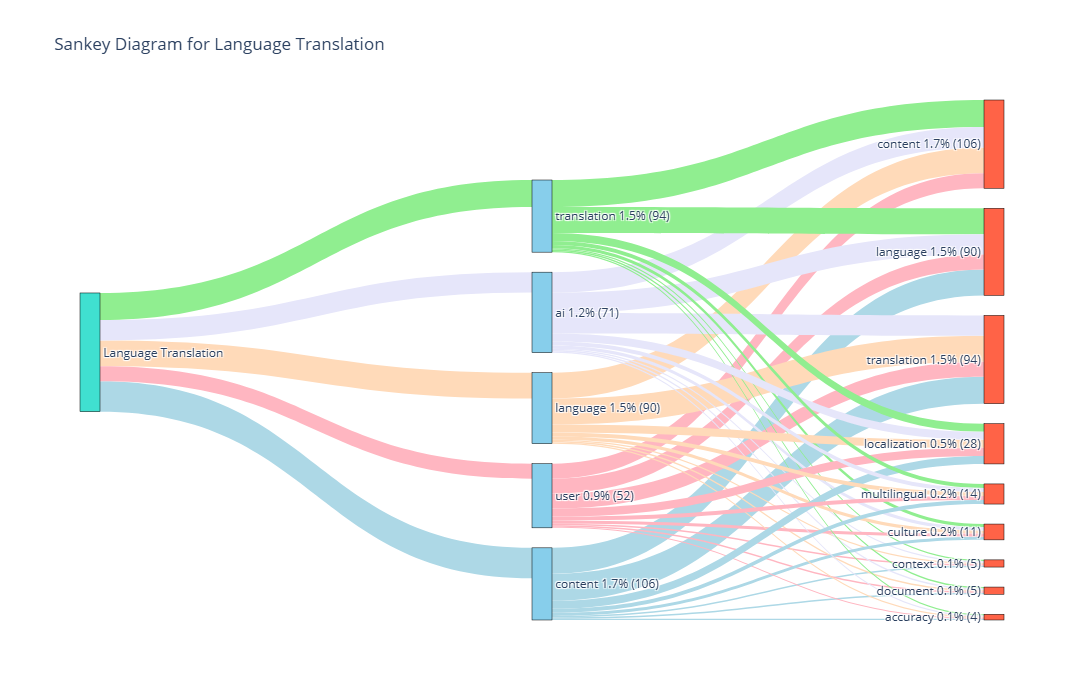

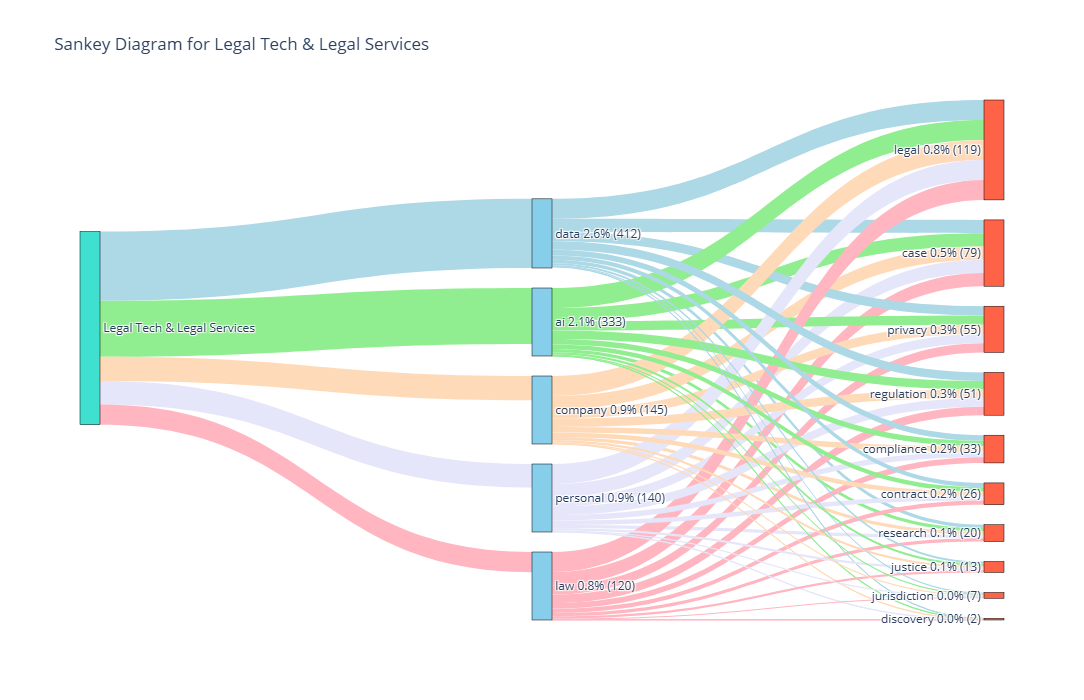

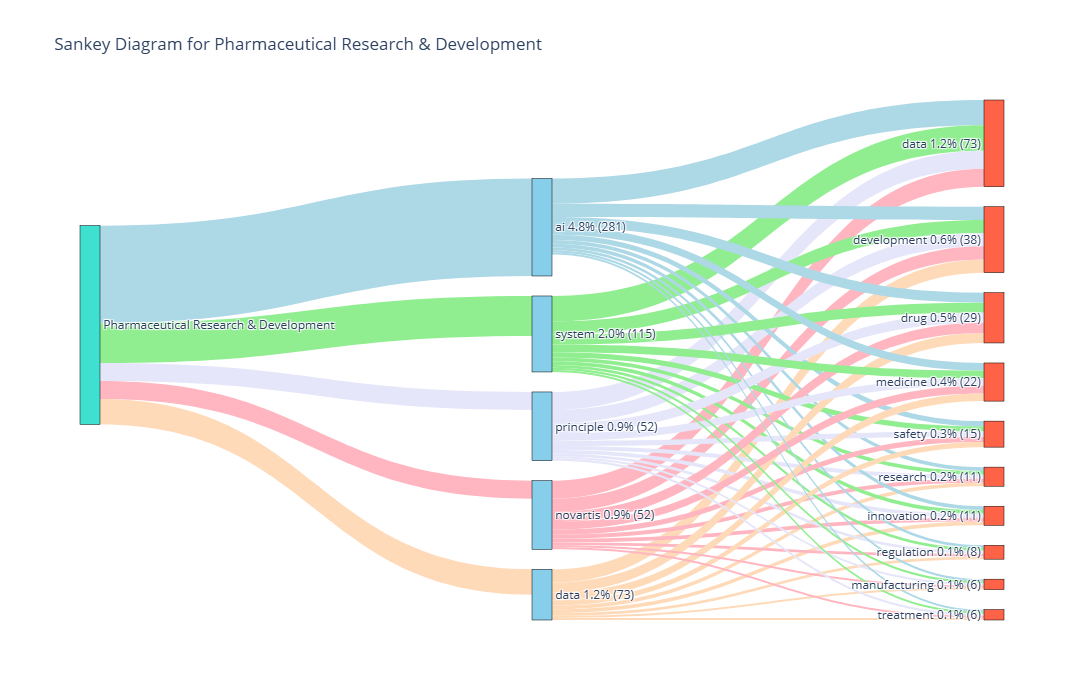

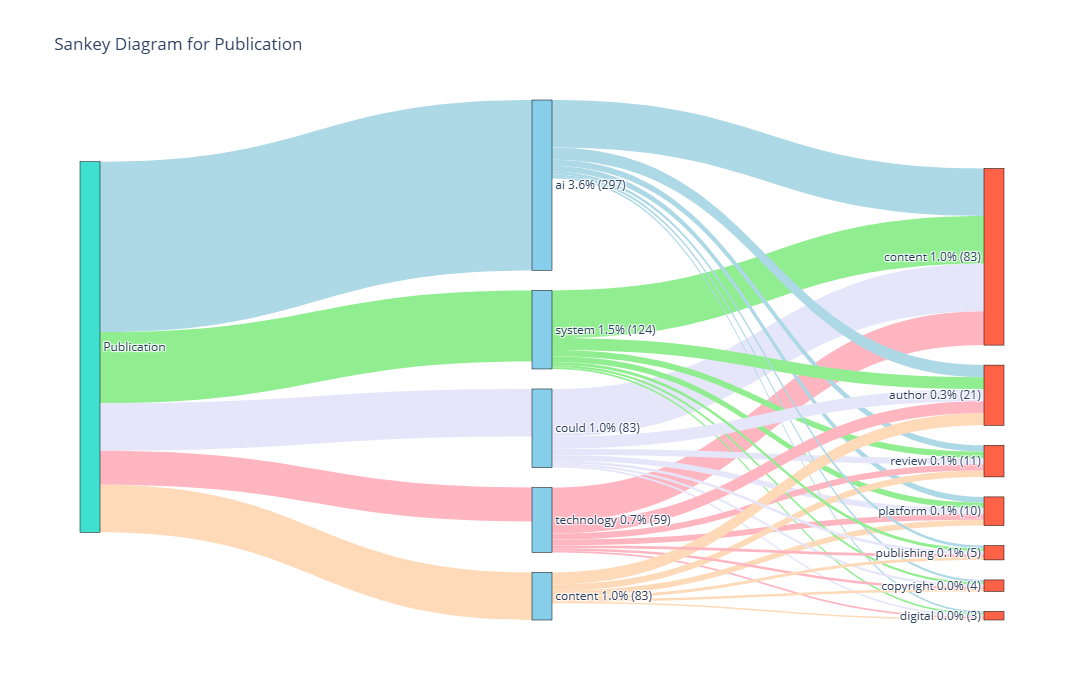

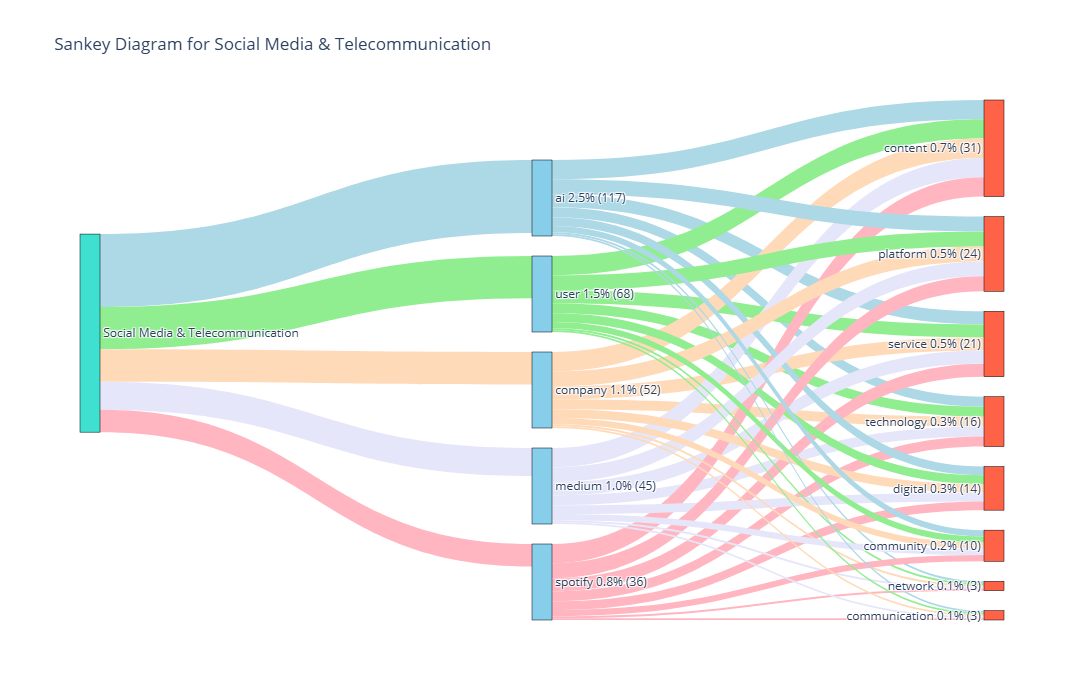

In [17]:
# Function to extract lemmatized words from text files
def process_txt(txt_path):
    with open(txt_path, 'r', encoding='utf-8') as file:
        text_content = file.read().lower()
    text_content = re.sub(r'[^\w\s]', '', text_content)
    words = word_tokenize(text_content)
    filtered_words = [word for word in words if word not in all_stopwords]
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return lemmatized_words

# Extract top co-occurring words
def get_top_words(words, n=10):
    return Counter(words).most_common(n)

# Define a fixed set of colors
link_color_palette = ['#ADD8E6', '#90EE90', '#FFDAB9', '#E6E6FA', '#FFB6C1', '#D3D3D3']

# Function to assign consistent colors based on words
def assign_color(word, color_dict, palette):
    if word not in color_dict:
        color_index = len(color_dict) % len(palette)
        color_dict[word] = palette[color_index]
    return color_dict[word]

# Prepare data for the Sankey diagram with consistent coloring
def prepare_sankey_data(industry, txt_file, keyword_list):
    sources, targets, values, labels, node_colors, link_colors = [], [], [], [], [], []
    links_set = set()  # To prevent duplicate links
    color_dict = {}  # Dictionary to store colors for each word/keyword

    words = process_txt(txt_file)

    # Add industry as the root node (first segment)
    industry_node = 0
    labels.append(f"{industry}")
    node_colors.append('turquoise')  # Gold color for industry
    total_word_count = len(words)

    # Segment 2: Most frequent words from text
    second_segment_index = len(labels)
    top_words = get_top_words(words, n=5)
    top_word_dict = {}

    for word, freq in top_words:
        if freq > 1:  # Filter low-frequency words
            word_percentage = round((freq / total_word_count) * 100, 1)
            labels.append(f"{word} {word_percentage}% ({freq})")
            node_colors.append('#87CEEB')  # Light blue for frequent words
            top_word_dict[word] = len(labels) - 1
            sources.append(industry_node)
            targets.append(top_word_dict[word])
            values.append(freq)

            # Assign a consistent color to the word
            link_colors.append(assign_color(word, color_dict, link_color_palette))

    # Segment 3: Implementation keywords
    for keyword in keyword_list:
        kw_freq = words.count(keyword)
        if kw_freq > 1:
            kw_percentage = round((kw_freq / total_word_count) * 100, 1)

            # Add keyword to third segment
            labels.append(f"{keyword} {kw_percentage}% ({kw_freq})")
            node_colors.append('#FF6347')  # Tomato color for keywords
            kw_index = len(labels) - 1

            # Find connections between top words and implementation keywords
            for word, freq in top_words:
                if word in words and keyword in words and word != keyword:
                    if (top_word_dict[word], kw_index) not in links_set:
                        sources.append(top_word_dict[word])
                        targets.append(kw_index)
                        values.append(min(freq, kw_freq))  # Use the minimum count to avoid over-weighting
                        links_set.add((top_word_dict[word], kw_index))

                        # Assign a consistent color to the keyword link
                        link_colors.append(assign_color(word, color_dict, link_color_palette))

    return sources, targets, values, labels, node_colors, link_colors

# Function to plot the Sankey diagram
def plot_sankey(top_implementation_keywords, txt_files):
    for industry, txt_file in zip(top_implementation_keywords.keys(), txt_files):
        keyword_list = top_implementation_keywords[industry]
        sources, targets, values, labels, node_colors, link_colors = prepare_sankey_data(industry, txt_file, keyword_list)

        # Check if we have data to plot
        if not sources or not targets or not values:
            print(f"No data to plot for industry: {industry}")
            continue

        # Create Sankey diagram with colored links
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=20,
                thickness=20,
                line=dict(color='black', width=0.5),
                label=labels,
                color=node_colors
            ),
            link=dict(
                source=sources,
                target=targets,
                value=values,
                color=link_colors
            )
        )])

        fig.update_layout(
            title_text=f"Sankey Diagram for {industry}",
            font_size=12,
            height=700,
            width=1100
        )

        fig.show()

# Generate and plot Sankey diagrams
plot_sankey(top_implementation_keywords, txt_files)